In [1]:
from pyALT import *
import pyALT.io as io
from scipy.stats import kendalltau
from scipy.stats import pearsonr

In [2]:
G = io.load('meso_cortex.pk')

In [3]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,.98)
# L.set_theta('MOB',0.46)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core(100)

In [10]:
print("'node'","'Description'","'PC'")
for node,p in pc[0:10]:
    print(node,f"'{G.node[node]['name']}'",f'{p:.2}')

'node' 'Description' 'PC'
CLA 'Claustrum' 0.26
SSs 'Supplemental somatosensory area' 0.23
PTLp 'Posterior parietal association areas' 0.21
AUDv 'Ventral auditory area' 0.19
MOs 'Secondary motor area' 0.12
VISl 'Lateral visual area' 0.11
VISC 'Visceral area' 0.1
PERI 'Perirhinal area' 0.098
AIp 'Agranular insular area, posterior part' 0.091
ENTm 'Entorhinal area, medial part, dorsal zone' 0.089


(0, 100)

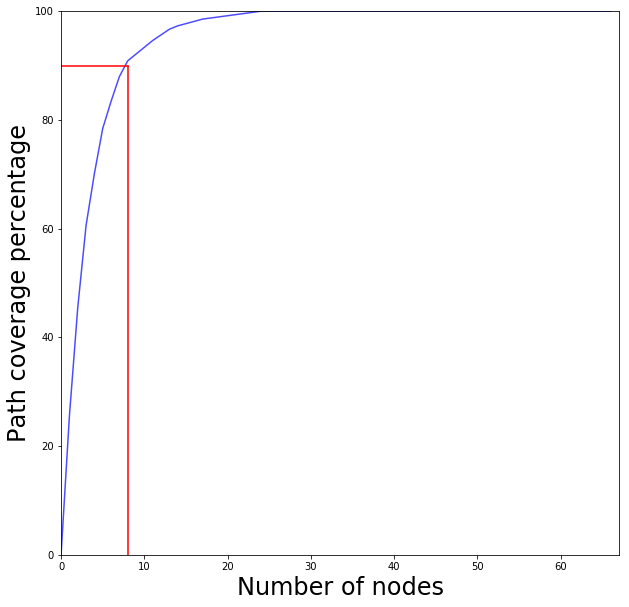

In [14]:
ax = L.core_plot(core,67)
ax.plot([8,8],[0,90],'r')
ax.plot([0,8],[90,90],'r')
ax.set_xlim([0,67])
ax.set_ylim([0,100])

In [30]:
CS = 8 #core size
his = 0
p = 0
for i,w in enumerate(core):
    if i==CS:break
    for q,v in enumerate(pc):
        if v[0]==w[0]:
            tmp = q
            break
    p += w[1] - core[i+1][1]
    print(w[0],'"'+G.node[w[0]]['name']+'"',int(100*(p-his)/526),q+1)
    his = p

CLA "Claustrum" 23 1
PTLp "Posterior parietal association areas" 18 3
AUDv "Ventral auditory area" 13 4
SSs "Supplemental somatosensory area" 8 2
MOs "Secondary motor area" 7 5
ACAd "Anterior cingulate area, dorsal part" 4 13
VISl "Lateral visual area" 4 6
ECT "Ectorhinal area" 2 19


In [61]:
for w in core:
    for i,v in enumerate(pc):
        if v[0]==w[0]:
            print(w,i+1)

('CLA', 526) 1
('PTLp', 402) 3
('AUDv', 305) 4
('SSs', 226) 2
('AOB', 180) 7
('MOs', 137) 5
('ACAd', 103) 16
('VISl', 79) 9
('ECT', 57) 22


In [60]:
pc

[('CLA', 0.23574144486692014),
 ('SSs', 0.21673003802281368),
 ('PTLp', 0.1958174904942966),
 ('AUDv', 0.1844106463878327),
 ('MOs', 0.11216730038022814),
 ('PERI', 0.10836501901140684),
 ('AOB', 0.10646387832699619),
 ('COAp', 0.10076045627376426),
 ('VISl', 0.09885931558935361),
 ('VISC', 0.09695817490494296),
 ('ENTm', 0.09125475285171103),
 ('ENTl', 0.08935361216730038),
 ('AIv', 0.08555133079847908),
 ('AIp', 0.08555133079847908),
 ('SUBv', 0.07604562737642585),
 ('ACAd', 0.07604562737642585),
 ('EPv', 0.0741444866920152),
 ('BLA', 0.06844106463878327),
 ('MOp', 0.060836501901140684),
 ('PA', 0.055133079847908745),
 ('LA', 0.051330798479087454),
 ('ECT', 0.049429657794676805),
 ('PAA', 0.045627376425855515),
 ('TT', 0.043726235741444866),
 ('AON', 0.043726235741444866),
 ('DG', 0.04182509505703422),
 ('CA3', 0.04182509505703422),
 ('VISpl', 0.039923954372623575),
 ('TR', 0.039923954372623575),
 ('POST', 0.039923954372623575),
 ('PIR', 0.039923954372623575),
 ('PAR', 0.039923954372

(0, 100)

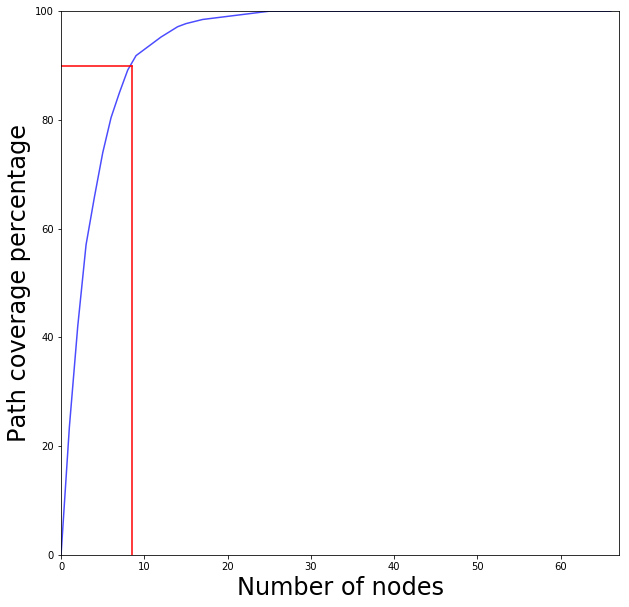

In [26]:
D = {}
for w in L.srcs:
    adag = L(w)
    D[w] = max([adag.nodes[xx]['level'] for xx in adag.nodes()])

Text(0,0.5,'Depth')

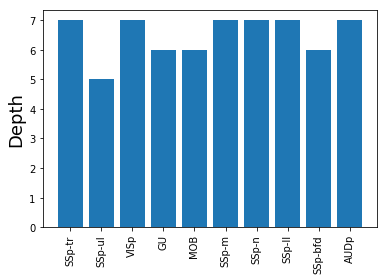

In [42]:
objects = ['VISp','SSp-bfd','SSp-ll','SSp-ul','SSp-tr','SSp-m','SSp-n','AUDp','GU','MOB']
y_pos = [D[xx] for xx in objects]
plt.bar(objects, y_pos, align='center')
plt.xticks(objects,rotation='vertical')
plt.ylabel('Depth',fontsize=18)

In [40]:
D['SSp-bfd']

6

In [11]:
with open('adags.pk','wb') as f:
    pk.dump(D,f)

In [79]:
ex = L.srcs
bc = nx.betweenness_centrality(G)
bc = process_metric(bc,ex)
bc_w = nx.betweenness_centrality(G,weight='weight')
bc_w = process_metric(bc_w,ex)
ev = nx.eigenvector_centrality(G)
ev = process_metric(ev,ex)
ev_w = nx.eigenvector_centrality(G,weight='weight')
ev_w = process_metric(ev_w,ex)
pr = nx.pagerank(G,weight=None)
pr = process_metric(pr,ex)
pr_w = nx.pagerank(G,weight='weight')
pr_w = process_metric(pr_w,ex)
dg = nx.degree_centrality(G)
dg = process_metric(dg,ex)
dg_w = dict(nx.degree(G,weight='weight'))
dg_w = process_metric(dg_w,ex)

In [22]:
from matplotlib import pyplot as plt

In [80]:
def plot(m1,m2,ax=None,c=False):
    if ax is None:
        fig,ax = plt.subplots(figsize=(5,5))
    d1 = dict(m1)
    d2 = dict(m2)
    vec1 = []
    vec2 = []
    for w in d1:
        v1 = d1[w]
        v2 = d2[w]
        if w in core_node:
            ax.plot(v1,v2,'r*',ms=8)
        else:
            if (not c):
                ax.plot(v1,v2,'bs',ms=6)
            else:
                ax.plot(v1,v2,'gs',ms=6)
        vec1.append(v1)
        vec2.append(v2)
    k,_ = kendalltau(vec1,vec2)
    p,_ = pearsonr(vec1,vec2)
    ax.set_xlim(left=-0.01)
    ax.set_ylim(bottom=-0.01)
    return (k,p)

Text(0.5,0,'Path centrality')

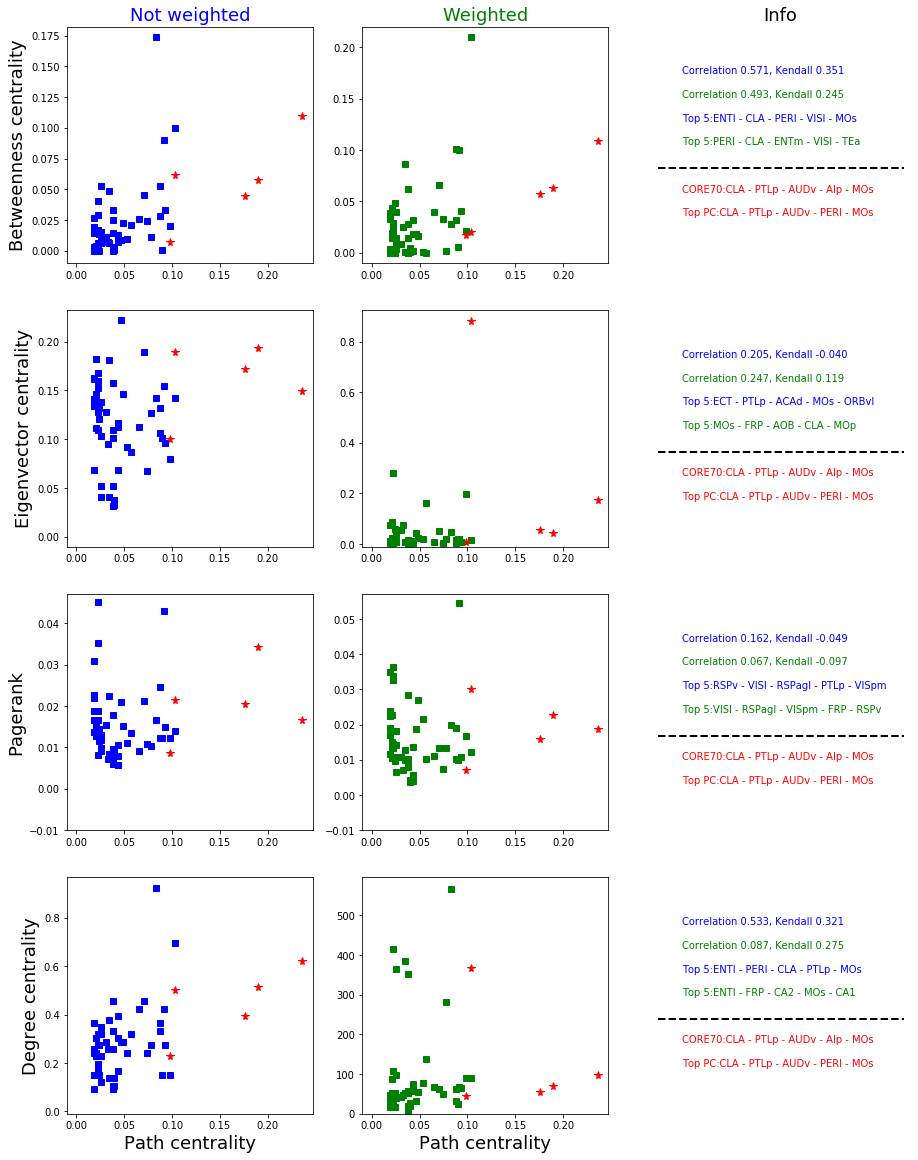

In [93]:
figf,ax = plt.subplots(nrows=4,ncols=3,figsize=(15,20))
mets = [(bc,bc_w,'Betweenness centrality'),(ev,ev_w,'Eigenvector centrality'),
        (pr,pr_w,'Pagerank'),(dg,dg_w,'Degree centrality')]
core5 = 'CORE70:'+' - '.join(core_node)
for i,w in enumerate(mets):
    k,p = plot(pc,w[0],ax[i,0])
    kw,pw = plot(pc,w[1],ax[i,1],True)
    st = f'Correlation {p:.3f}, Kendall {k:.3f} '
    stw = f'Correlation {pw:.3f}, Kendall {kw:.3f} '
    ax[i,2].text(0.1,.8,st,color='blue')
    ax[i,2].text(0.1,.7,stw,color='green')
    ax[i,0].set_ylabel(w[2],fontsize=18)
    top5 = 'Top 5:'+' - '.join([xx[0] for xx in w[0][0:5]])
    top5w = 'Top 5:'+' - '.join([xx[0] for xx in w[1][0:5]])
    toppc = 'Top PC:'+' - '.join([xx[0] for xx in pc[0:5]])
    ax[i,2].text(0.1,.6,top5,color='blue')
    ax[i,2].text(0.1,.5,top5w,color='green')
    ax[i,2].axhline(0.4,color='black',lw=2,ls='dashed')
    ax[i,2].text(0.1,.3,core5,color='red')
    ax[i,2].text(0.1,.2,toppc,color='red')
    ax[i,2].axis('off')
ax[0,0].set_title('Not weighted',fontsize=18,color='blue')
ax[0,2].set_title('Info',fontsize=18,color='black')
ax[0,1].set_title('Weighted',fontsize=18,color='green')
ax[3,0].set_xlabel('Path centrality',fontsize=18)
ax[3,1].set_xlabel('Path centrality',fontsize=18)

In [83]:
bc_w

[('PERI', 0.2097902097902098),
 ('CLA', 0.10909090909090909),
 ('ENTm', 0.10116550116550116),
 ('VISl', 0.10046620046620047),
 ('TEa', 0.08648018648018647),
 ('ACAd', 0.0662004662004662),
 ('PTLp', 0.06340326340326341),
 ('TR', 0.06177156177156177),
 ('AUDv', 0.057342657342657345),
 ('AId', 0.04871794871794872),
 ('BMA', 0.04312354312354312),
 ('COAp', 0.041025641025641026),
 ('SUBd', 0.03986013986013986),
 ('BLA', 0.03939393939393939),
 ('VISpm', 0.03822843822843823),
 ('ORBm', 0.03426573426573427),
 ('SUBv', 0.0331002331002331),
 ('VISam', 0.032867132867132866),
 ('AIv', 0.031701631701631705),
 ('TT', 0.03146853146853147),
 ('RSPv', 0.02937062937062937),
 ('ENTl', 0.02773892773892774),
 ('POST', 0.02773892773892774),
 ('FRP', 0.02634032634032634),
 ('ORBl', 0.02470862470862471),
 ('AOB', 0.021212121212121213),
 ('MOs', 0.020046620046620046),
 ('RSPagl', 0.019813519813519812),
 ('ORBvl', 0.01888111888111888),
 ('PAA', 0.018414918414918414),
 ('ECT', 0.017948717948717947),
 ('AIp', 0.0

[('CLA', 0.23620689655172414),
 ('PTLp', 0.1896551724137931),
 ('AUDv', 0.17586206896551723),
 ('PERI', 0.10344827586206896),
 ('MOs', 0.10344827586206896),
 ('AOB', 0.09827586206896552),
 ('AIp', 0.09827586206896552),
 ('COAp', 0.09310344827586207),
 ('VISl', 0.09137931034482759),
 ('VISC', 0.0896551724137931),
 ('ENTm', 0.08793103448275862),
 ('AIv', 0.08793103448275862),
 ('ENTl', 0.08275862068965517),
 ('EPv', 0.07758620689655173),
 ('SUBv', 0.07413793103448275),
 ('ACAd', 0.0706896551724138),
 ('BLA', 0.06551724137931035),
 ('MOp', 0.056896551724137934),
 ('PA', 0.05344827586206897),
 ('LA', 0.04827586206896552),
 ('ECT', 0.04655172413793104),
 ('TT', 0.04310344827586207),
 ('PAA', 0.04310344827586207),
 ('AON', 0.04310344827586207),
 ('DG', 0.039655172413793106),
 ('CA3', 0.039655172413793106),
 ('VISpl', 0.03793103448275862),
 ('TR', 0.03793103448275862),
 ('POST', 0.03793103448275862),
 ('PIR', 0.03793103448275862),
 ('PAR', 0.03793103448275862),
 ('TEa', 0.034482758620689655),

[('CLA', 580),
 ('PTLp', 443),
 ('AUDv', 339),
 ('AIp', 255),
 ('MOs', 203),
 ('AOB', 161),
 ('ACAd', 126),
 ('VISl', 101),
 ('ECT', 79),
 ('AId', 66),
 ('VISal', 58)]

In [19]:
L.P.P

{35: ['SSp-n', 'SSp-m', 'SSp-ul', 'SSp-ll', 'SSp-tr'],
 190: ['GU', 'SSp-m', 'SSp-ul', 'SSp-ll'],
 215: ['SSs', 'SSp-n'],
 243: ['SSs', 'SSp-ul'],
 247: ['SSs', 'SSp-bfd', 'SSp-tr'],
 250: ['SSs', 'SSp-m'],
 262: ['SSp-ul', 'SSp-m', 'SSp-n'],
 287: ['SSp-ul', 'SSs', 'GU'],
 288: ['SSp-ul', 'SSs', 'SSp-bfd'],
 340: ['SSp-tr', 'AUDp'],
 414: ['SSp-m', 'SSp-n', 'SSs', 'SSp-bfd'],
 415: ['SSp-m', 'SSs', 'SSp-bfd'],
 444: ['SSp-bfd', 'SSs', 'SSp-n'],
 474: ['SSp-bfd', 'SSp-tr'],
 477: ['SSp-bfd', 'SSp-ul', 'SSp-m'],
 515: ['SSp-ll', 'AUDp']}

In [12]:
L.P.bestNode()

TypeError: 'NoneType' object is not iterable

In [15]:
len(L)

0

In [16]:
L.run()

AttributeError: 'ALT' object has no attribute 'run'